# Let's go through the entire pipeline.

## 1. Camera Calibration

These are the main steps for camera calibration

1.1 Distortion correction

a. Find corners

b. (Draw corners)

c. Find objpoints and imgpoints (see https://github.com/udacity/CarND-Camera-Calibration/blob/master/camera_calibration.ipynb)

d. calibrate camera and undistort

1.2 Perspective Transform

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle
import glob

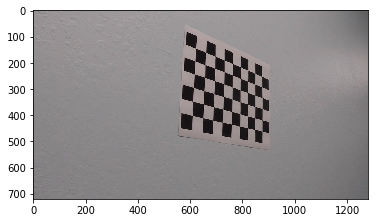

In [2]:
# Read image
camera_cal_path = "camera_cal/"
fnames = os.listdir(camera_cal_path)
idx = 4
fname = fnames[idx]
img = cv2.imread(os.path.join(camera_cal_path, fname))
plt.imshow(img)

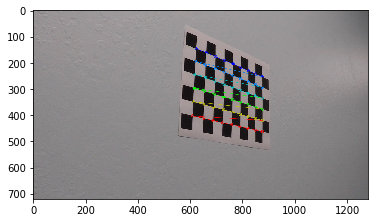

In [3]:
# Find corners
nx = 9  # according to project instructions
ny = 6
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Convert to grayscale

ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None) # Find the chessboard corners

if ret == True:
    cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
    plt.imshow(img)

In [11]:
for idx, fname in enumerate(images):
    img = cv2.imread(fname)
    img_size = (img.shape[1], img.shape[0])
    print(img_size)
    #assert img_size == (1280, 720)  # all images are of this size
# there are two images of size (1281, 721)

(1280, 720)
(1280, 720)
(1280, 720)
(1280, 720)
(1280, 720)
(1280, 720)
(1280, 720)
(1280, 720)
(1280, 720)
(1281, 721)
(1280, 720)
(1280, 720)
(1280, 720)
(1280, 720)
(1280, 720)
(1281, 721)
(1280, 720)
(1280, 720)
(1280, 720)
(1280, 720)


In [12]:
# Find objpoints and imgpoints 
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
# %matplotlib inline

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((ny*nx,3), np.float32)
objp[:,:2] = np.mgrid[0:nx, 0:ny].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('camera_cal/calibration*.jpg')

# Step through the list and search for chessboard corners
# f = plt.figure()
# f.tight_layout()
for idx, fname in enumerate(images):
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (nx,ny), None)

    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)
        # Not necessary to Draw and display the corners
        cv2.drawChessboardCorners(img, (nx,ny), corners, ret)

In [13]:
# Calibrate camera and save important information as pickle objects
img_size = (1280, 720)
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)
dist_pickle = dict(objpoints=objpoints, imgpoints=imgpoints, mtx=mtx, dist=dist)
pickle.dump(dist_pickle, open("camera_cal/dist_pickle.p", "wb"))

Test module

In [13]:
import calib_camera
from calib_camera import find_obj_and_img_points, calibrate_camera
import glob
import pickle
calib_camera.logger.setLevel("DEBUG")

In [14]:
nx = 9
ny = 6
images = glob.glob("camera_cal/calibration*.jpg")
pickle_file = "camera_cal/dist_pickle.p"

objpoints, imgpoints = find_obj_and_img_points(images, nx, ny)
mtx, dist = calibrate_camera(objpoints, imgpoints, (1280, 720), pickle=False)

2019-09-26 09:34:23,482 - CalibCamera - INFO - Found corners on 17 images
2019-09-26 09:34:24,476 - CalibCamera - INFO - Returned mtx and dist from camera calibration


In [15]:
dict_pickle = dict(objpoints=objpoints, imgpoints=imgpoints, mtx=mtx, dist=dist)
pickle.dump(dict_pickle, open(pickle_file, "wb"))

In [26]:
d_pickle = pickle.load(open(pickle_file, "rb"))